In [117]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://query.data.world/s/oafljdbdrybdgfcbh6iqhlx5jrfzjx?dws=00000')

In [118]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [119]:
df.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
Adjusted Activity Type Code    object
Adjusted Passenger Count        int64
Year                            int64
Month                          object
dtype: object

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14796\233556429.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Month', y='Passenger Count', estimator='sum', ci=None)


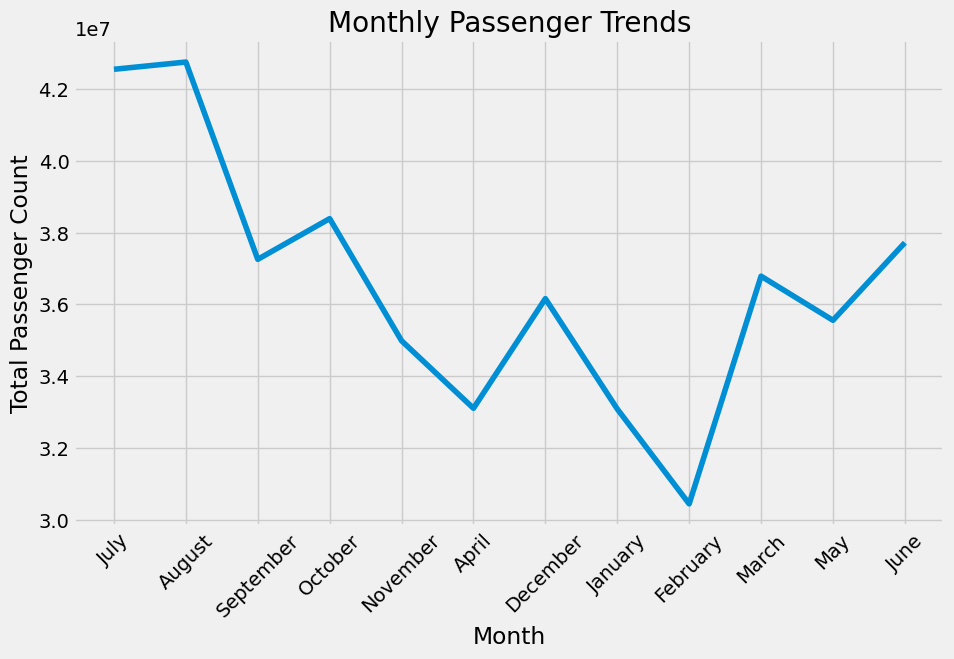

In [120]:
# Monthly Passenger Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Passenger Count', estimator='sum', ci=None)
plt.xlabel('Month')
plt.ylabel('Total Passenger Count')
plt.title('Monthly Passenger Trends')
plt.xticks(rotation=45)
plt.show()

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_14796\1980253388.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df, y='Operating Airline', x='Passenger Count', ci=None)


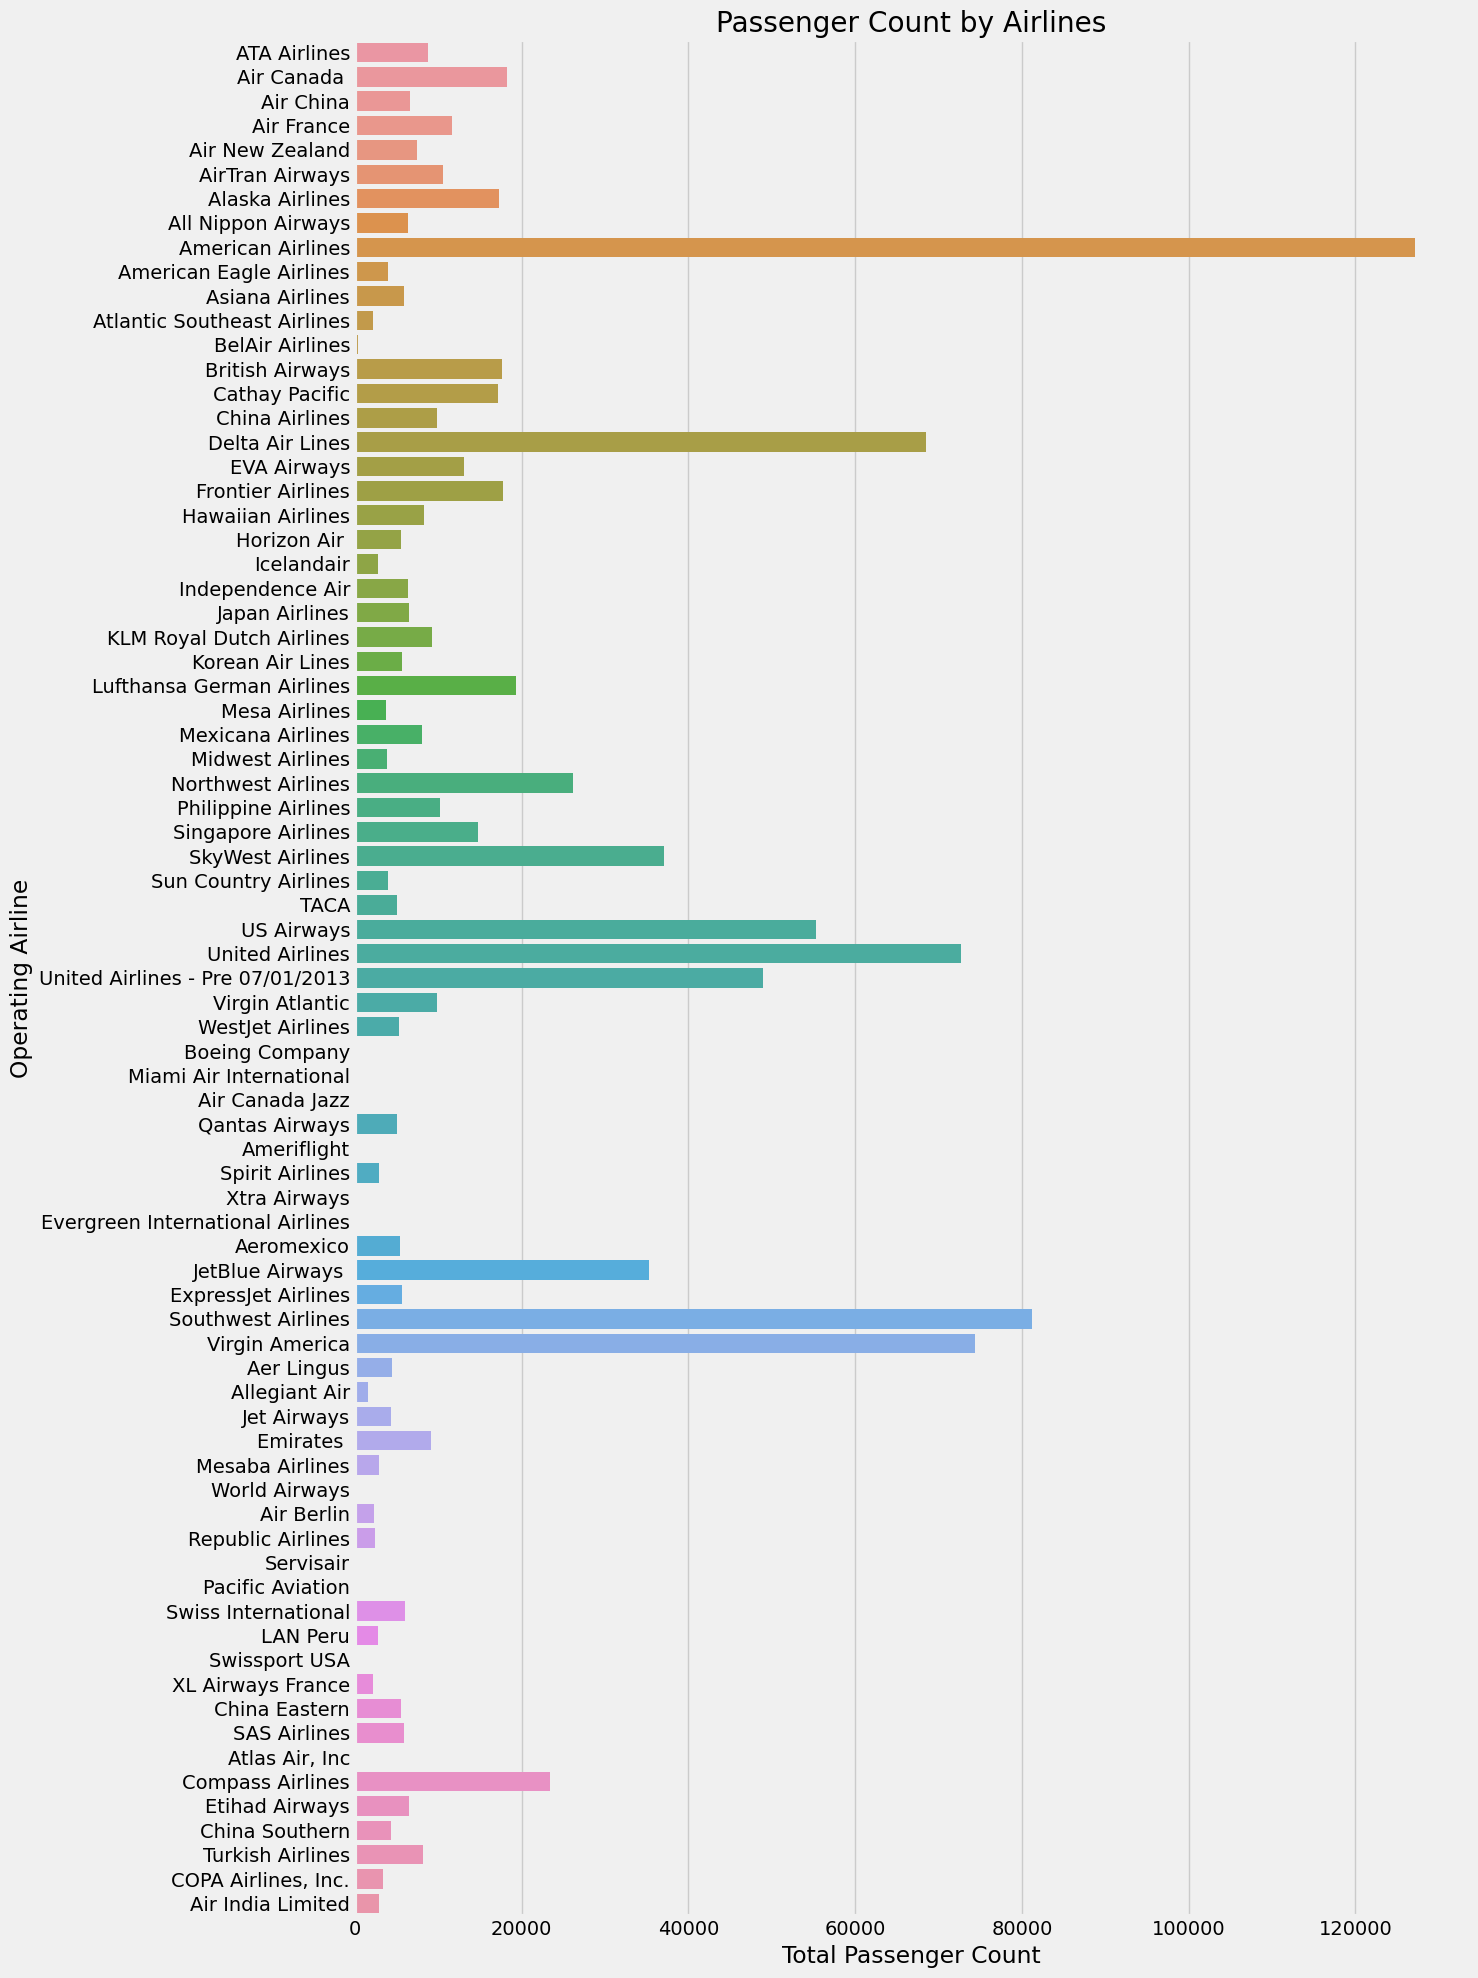

In [121]:
plt.figure(figsize=(15, 20))  # Adjust figsize for horizontal layout
ax = sns.barplot(data=df, y='Operating Airline', x='Passenger Count', ci=None)
plt.ylabel('Operating Airline')
plt.xlabel('Total Passenger Count')
plt.title('Passenger Count by Airlines')
plt.tight_layout()
plt.show()

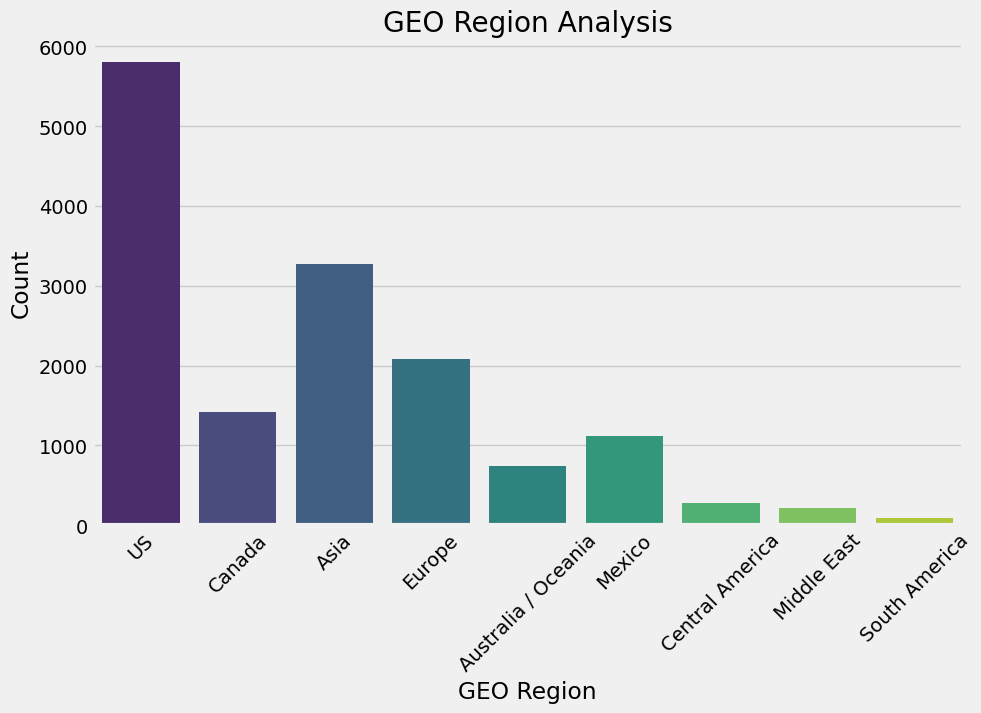

In [122]:
# GEO Region Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GEO Region', palette='viridis')
plt.xlabel('GEO Region')
plt.ylabel('Count')
plt.title('GEO Region Analysis')
plt.xticks(rotation=45)
plt.show()

In [123]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Columns to drop
columns_to_drop = [
    'Activity Period', 'Operating Airline IATA Code', 'Published Airline',
    'Published Airline IATA Code', 'Activity Type Code', 'Terminal',
    'Adjusted Activity Type Code', 'Boarding Area'
]

# Drop specified columns
df = df.drop(columns=columns_to_drop)

In [125]:
# Encode categorical columns
encoder = LabelEncoder()
categorical_columns = ['Operating Airline', 'GEO Summary', 'GEO Region', 'Price Category Code', 'Month']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [126]:
# Determine the number of clusters (you can experiment with this)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [127]:
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Print the cluster characteristics
cluster_characteristics = df.groupby('Cluster').mean()
print(cluster_characteristics)

         Operating Airline  GEO Summary  GEO Region  Price Category Code  \
Cluster                                                                    
0                46.323519     0.000183    7.999634             0.680505   
1                41.285807     1.000000    2.197198             0.981214   
2                69.581818     0.000000    8.000000             1.000000   

         Passenger Count  Adjusted Passenger Count         Year     Month  
Cluster                                                                    
0           41275.625640              41440.518837  2010.060351  5.535662  
1           10930.880009              10981.910957  2010.549354  5.528505  
2          340772.439394             340772.439394  2011.187879  5.539394  


In [128]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

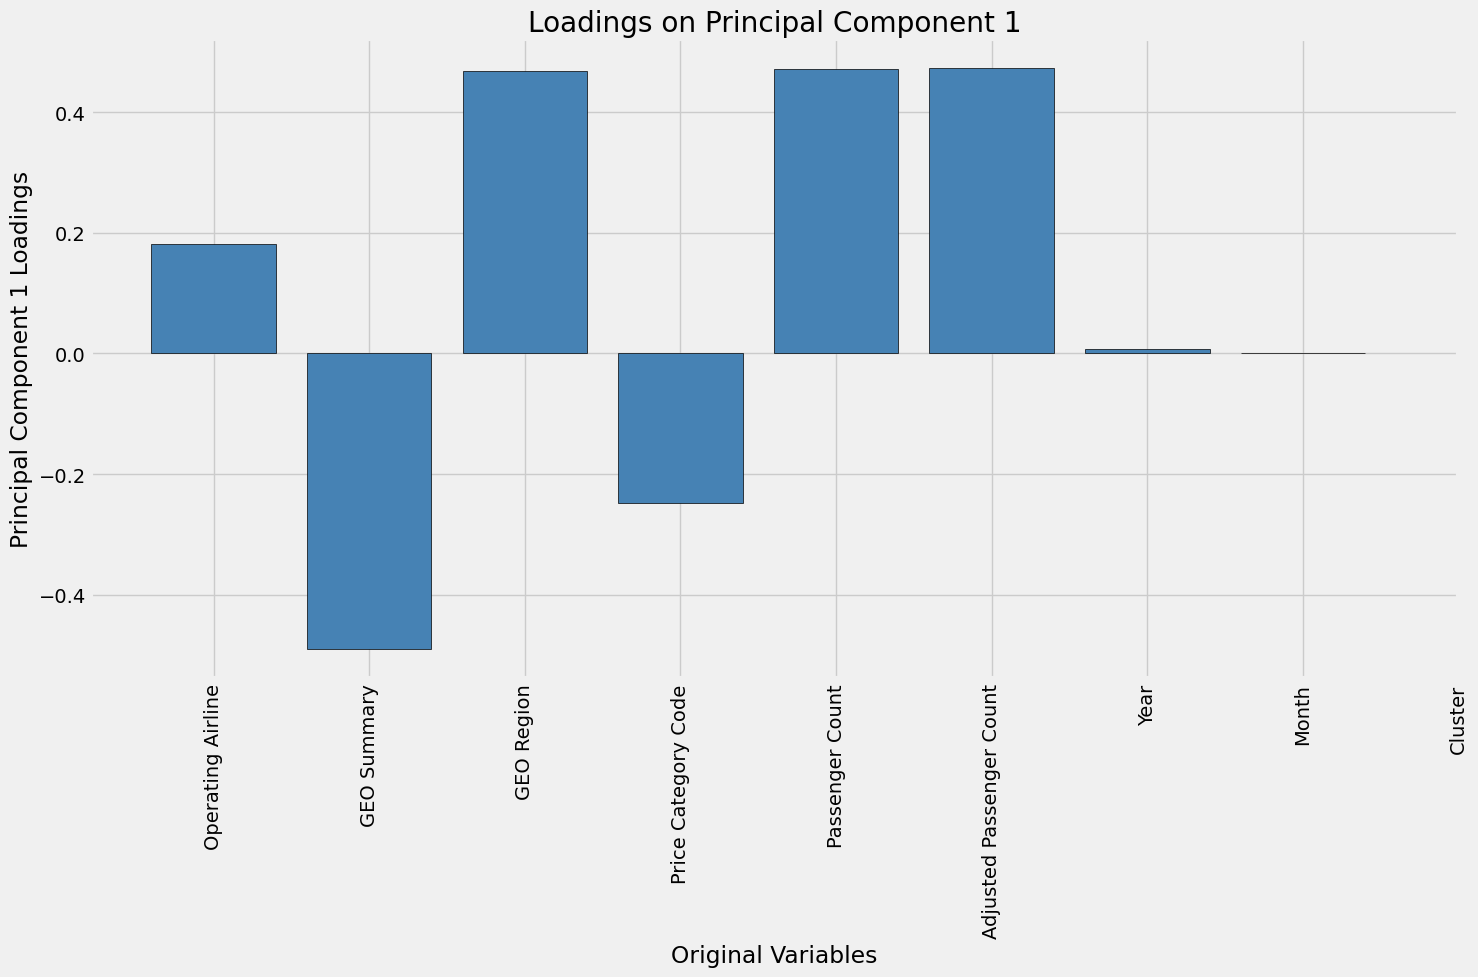

In [137]:
# Plot the loadings for the first principal component
plt.figure(figsize=(15, 10))
plt.bar(range(8), pc_loadings[0], color='steelblue', edgecolor='black')
plt.xticks(range(num_columns), df.columns, rotation=90)
plt.xlabel('Original Variables')
plt.ylabel('Principal Component 1 Loadings')
plt.title('Loadings on Principal Component 1')
plt.tight_layout()  # To prevent overlapping of labels
plt.show()

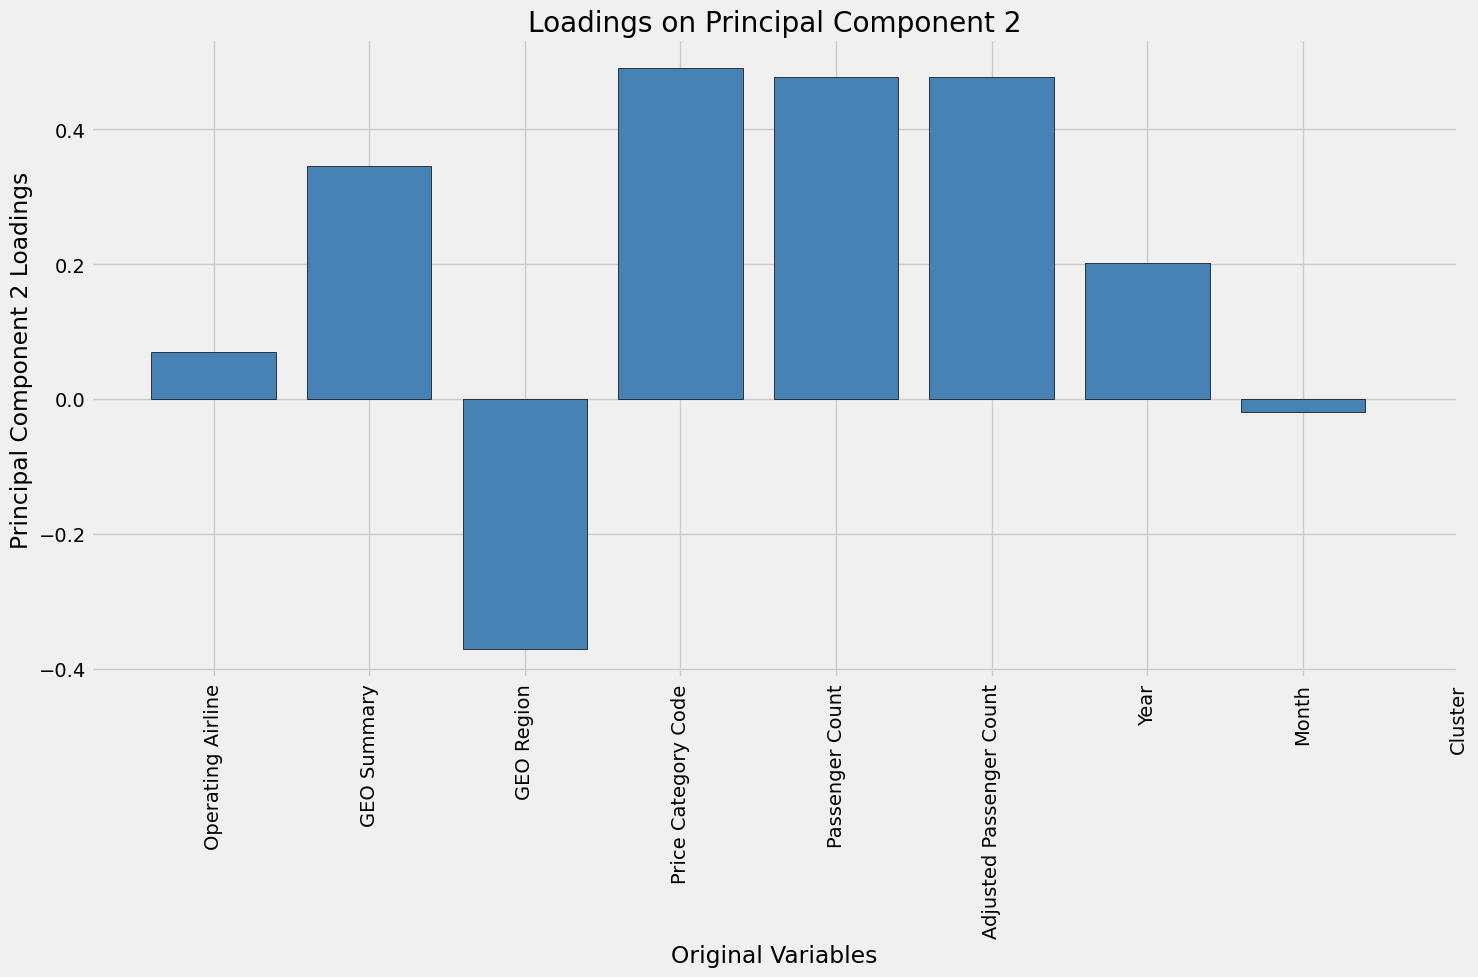

In [140]:
# Plot the loadings for the first principal component
plt.figure(figsize=(15, 10))
plt.bar(range(8), pc_loadings[1], color='steelblue', edgecolor='black')
plt.xticks(range(num_columns), df.columns, rotation=90)
plt.xlabel('Original Variables')
plt.ylabel('Principal Component 2 Loadings')
plt.title('Loadings on Principal Component 2')
plt.tight_layout()  # To prevent overlapping of labels
plt.show()

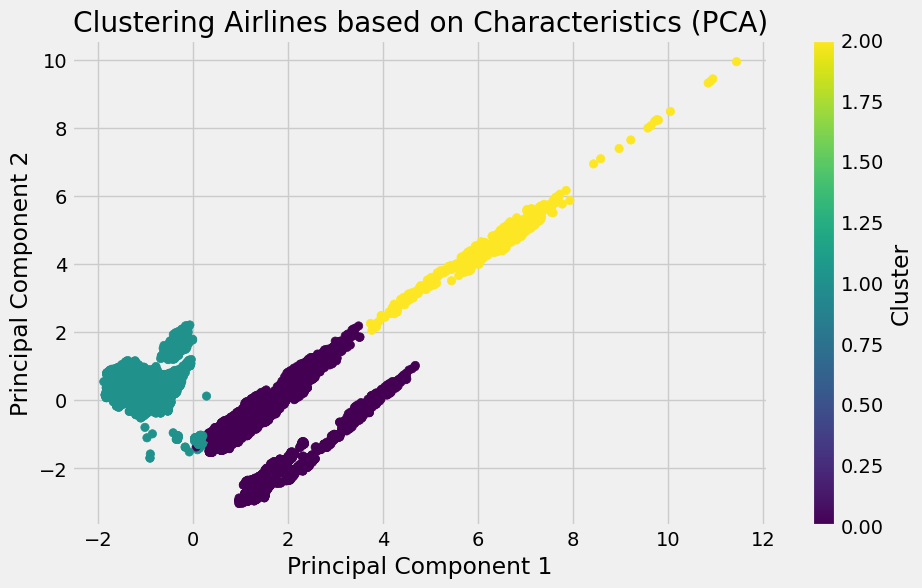

In [130]:
# Visualize the clusters in the reduced space
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Airlines based on Characteristics (PCA)')
plt.colorbar(label='Cluster')
plt.show()

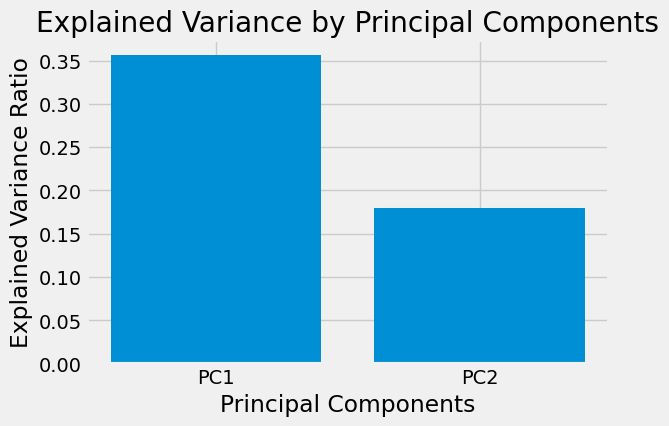

In [131]:
# Explained variance by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Bar plot of explained variance
plt.figure(figsize=(6, 4))
plt.bar(range(2), explained_variance_ratio, tick_label=['PC1', 'PC2'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()